In [1]:
# Load Libraries
from sklearn.datasets import make_blobs
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot

In [2]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)

In [3]:
# one hot encode output variable
y = to_categorical(y)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

In [4]:
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(3, activation='softmax'))


In [5]:
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='kullback_leibler_divergence', optimizer=opt, metrics=['accuracy'])


In [6]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print("Trainging Accuracy : {} and Testing Accuracy : {}".format(train_acc, test_acc))

Trainging Accuracy : 0.8379999995231628 and Testing Accuracy : 0.8100000023841858


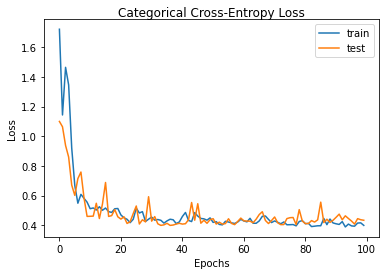

In [7]:
# plot loss during training
pyplot.title('Categorical Cross-Entropy Loss', pad=-20)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.xlabel("Epochs")
pyplot.ylabel("Loss")
pyplot.show()


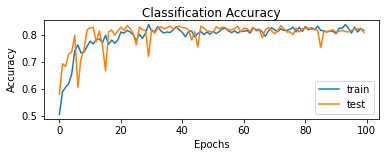

In [8]:
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Classification Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.xlabel("Epochs")
pyplot.ylabel("Accuracy")
pyplot.show()


In [10]:
!jupyter nbconvert --to script kullback_leibler_vivergence_loss_function.ipynb

[NbConvertApp] Converting notebook kullback_leibler_vivergence_loss_function.ipynb to script
[NbConvertApp] Writing 2035 bytes to kullback_leibler_vivergence_loss_function.py
